<a href="https://colab.research.google.com/github/TShuri/NeuralNetwork/blob/main/NumbersKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

Загрузка обучающей и тестовой выборки

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Нормализация входных данных

In [6]:
# нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 20 изображений из обучающей выборки

<function matplotlib.pyplot.show(close=None, block=None)>

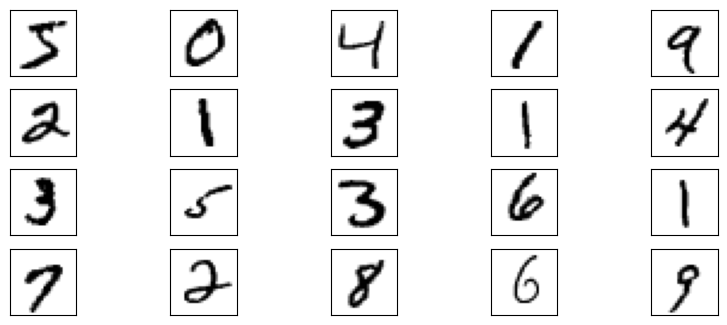

In [9]:
# отображение первых 20 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show

Формирование модели нейронной сети

In [10]:
# инициализация нейронной сети
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary()) # вывод структуры нейронной сети в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Компиляция нейронной сети с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [13]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1277 - accuracy: 0.9631 - val_loss: 0.1217 - val_accuracy: 0.9643
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.1057 - val_accuracy: 0.9690
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0496 - accuracy: 0.9855 - val_loss: 0.0926 - val_accuracy: 0.9736
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0915 - val_accuracy: 0.9736


In [14]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9784


[0.08020811527967453, 0.9783999919891357]

Проверка распознования цифр

1/1 [==============================] - 0s 48ms/step
[[8.5462339e-09 7.6228646e-10 5.6854232e-09 8.6611453e-07 1.5634282e-06
  1.0075631e-06 9.8310284e-09 1.1189494e-06 4.1409644e-06 9.9999130e-01]]
Распознанная цифра: 9


<function matplotlib.pyplot.show(close=None, block=None)>

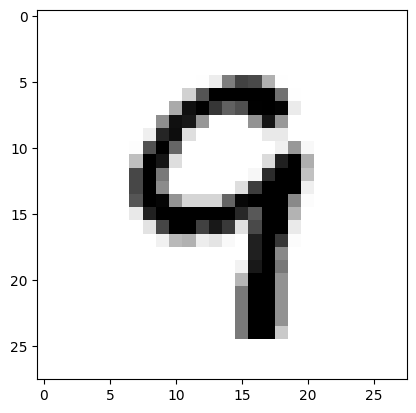

In [16]:
n = 150
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show